In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

/var/folders/hv/b1wcvr5j7bb1mzjm00fwl5zm0000gn/T/ipykernel_5576/1256544042.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# fetch the KDD99Cup dataset
file_path = '/Users/nisha/Desktop/spring2024/MachineLearning/kddcup99_csv.csv'
df = pd.read_csv(file_path)

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [3]:
# identify names of probe attacks
# https://kdd.ics.uci.edu/databases/kddcup99/kddcup.names
probe_attacks = ['ipsweep', 'nmap', 'portsweep', 'satan']

# one hot encode "label" column -> 1 for probe attacks, 0 for non probe attacks
df['label'] = df['label'].apply(lambda x: 1 if x in probe_attacks else 0)

In [4]:
# one hot encode all other categorical features into numerical features
    # must happen or it causes errors when the model tries to convert string values to float
categorical_columns = ['protocol_type', 'service', 'flag']
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(df[categorical_columns])
# convert the encoded data into a DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))
# concatenate the encoded_df with the original df & drop the original columns
df_encoded = pd.concat([df.drop(categorical_columns, axis=1), encoded_df], axis=1)

df_encoded.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,181,5450,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,239,486,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,235,1337,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,219,1337,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,217,2032,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [5]:
# split data into test and train
X = df_encoded.iloc[:, :-1]
y = df_encoded.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# train logistic regression model
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [7]:
# make predictions
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [8]:
# calculate test and train accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("# of iterations:", lr.n_iter_[0])

Train Accuracy: 0.9999873486903365
Test Accuracy: 0.9999797579045383
# of iterations: 39


### The training accuracy was 99.9987% and the testing accuracy was 99.9979%. Thus, I don't believe my model overfits as the testing accuracy is nearly identical to the training accuracy. This indicates that the model is able to accurately predict unseen data, and therefore, it couldn't have overfit the training data. The logistic regression model took only 39 iterations to converge.

In [9]:
features_df = df_encoded.drop('label', axis=1)
feature_names = features_df.columns.tolist()
# find absolute value of model's coefficients (aka weights of features)
coef_abs = np.abs(lr.coef_[0])
feature_importance = pd.DataFrame(coef_abs, index=feature_names, columns=['abs_weight'])
# sort features by those w/ highest weights (aka "most informative" features)
feature_importance_sorted = feature_importance.sort_values(by='abs_weight', ascending=False)

print(feature_importance_sorted)

                            abs_weight
dst_host_srv_count        2.203854e+00
serror_rate               1.298639e+00
srv_serror_rate           1.285527e+00
dst_host_srv_serror_rate  1.282569e+00
dst_host_serror_rate      1.236383e+00
...                                ...
service_remote_job        3.047817e-11
service_pop_2             3.047674e-11
lnum_outbound_cmds        0.000000e+00
is_host_login             0.000000e+00
service_tim_i             0.000000e+00

[118 rows x 1 columns]


### The feature 'dst_host_srv_count' has the highest weight by far, indicating it's very informative for my model. This feature represents the number of connections to the same service as the current connection. When this feature is high, this could indicate that scanning is occuring. It seems that scanning is an important factor that differentiates between probing and non-probing attacks, and therefore, this feature having a high weight makes sense.

In [10]:
# train model with L1 and L2 regularization
# had to adjust "tolerance" for lr_l1 because it wasn't converging
lr_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, random_state=42, max_iter=2000, tol=0.01)
lr_l1.fit(X_train, y_train)
lr_l2 = LogisticRegression(penalty='l2', solver='liblinear', C=1.0, random_state=42)
lr_l2.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [11]:
print("# of iterations:", lr_l1.n_iter_[0])
print("# of iterations:", lr_l2.n_iter_[0])

# of iterations: 17
# of iterations: 26


In [12]:
# make predictions
y_train_pred_l1 = lr_l1.predict(X_train)
y_test_pred_l1 = lr_l1.predict(X_test)
y_train_pred_l2 = lr_l2.predict(X_train)
y_test_pred_l2 = lr_l2.predict(X_test)

In [13]:
train_accuracy_l1 = accuracy_score(y_train, y_train_pred_l1)
test_accuracy_l1 = accuracy_score(y_test, y_test_pred_l1)
train_accuracy_l2 = accuracy_score(y_train, y_train_pred_l2)
test_accuracy_l2 = accuracy_score(y_test, y_test_pred_l2)

print("L1:")
print("\tTrain Accuracy:", train_accuracy_l1)
print("\tTest Accuracy:", test_accuracy_l1)
print("L1:")
print("\tTrain Accuracy:", train_accuracy_l2)
print("\tTest Accuracy:", test_accuracy_l2)

L1:
	Train Accuracy: 1.0
	Test Accuracy: 1.0
L1:
	Train Accuracy: 0.9999924092142018
	Test Accuracy: 1.0


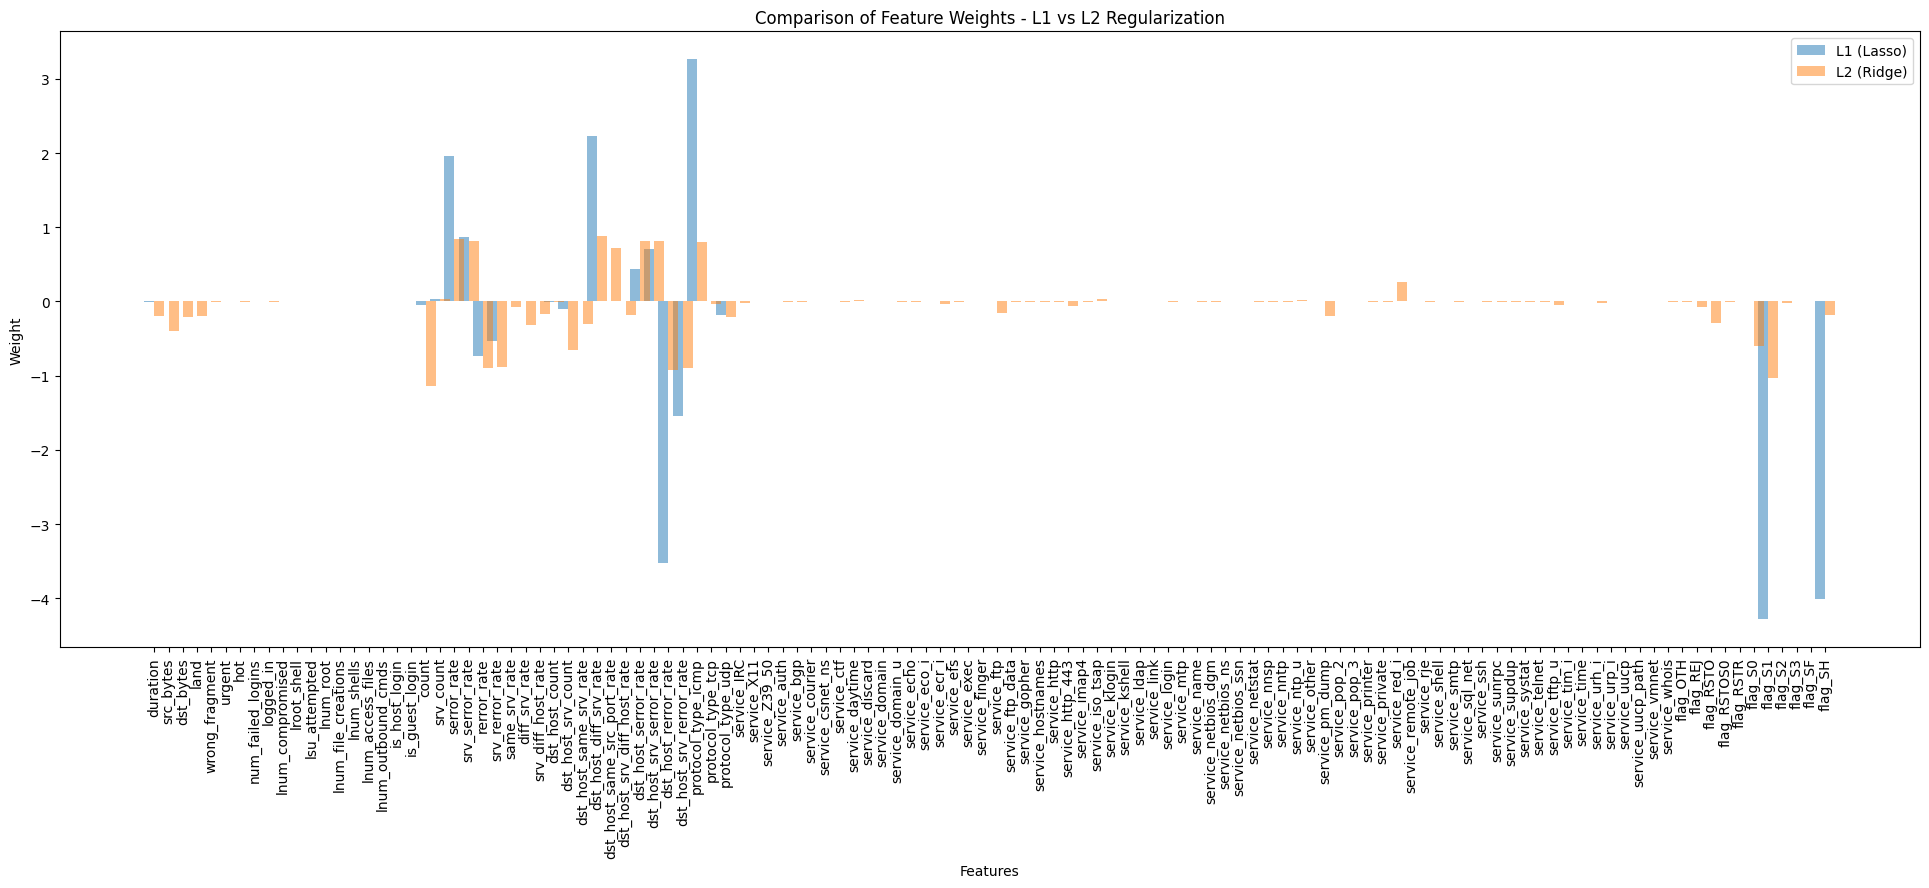

In [14]:
weights_l1 = lr_l1.coef_[0]
weights_l2 = lr_l2.coef_[0]

# set the positions for the bars
pos = np.arange(len(feature_names))
bar_width = .7

plt.figure(figsize=(24, 8))

# plot L1 weights
plt.bar(pos - bar_width/2, weights_l1, bar_width, label='L1 (Lasso)', alpha=0.5)

# plot L2 weights
plt.bar(pos + bar_width/2, weights_l2, bar_width, label='L2 (Ridge)', alpha=0.5)

plt.xticks(pos, feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Weight')
plt.title('Comparison of Feature Weights - L1 vs L2 Regularization')
plt.legend()
plt.show()

In [15]:
C_values = [.001, .01, .1, 1, 10, 100]
train_accuracies = []
test_accuracies = []

for C in C_values:
    lr = LogisticRegression(penalty='l2', C=C, solver='liblinear', random_state=42)
    lr.fit(X_train, y_train)
    train_accuracies.append(accuracy_score(y_train, lr.predict(X_train)))
    test_accuracies.append(accuracy_score(y_test, lr.predict(X_test)))

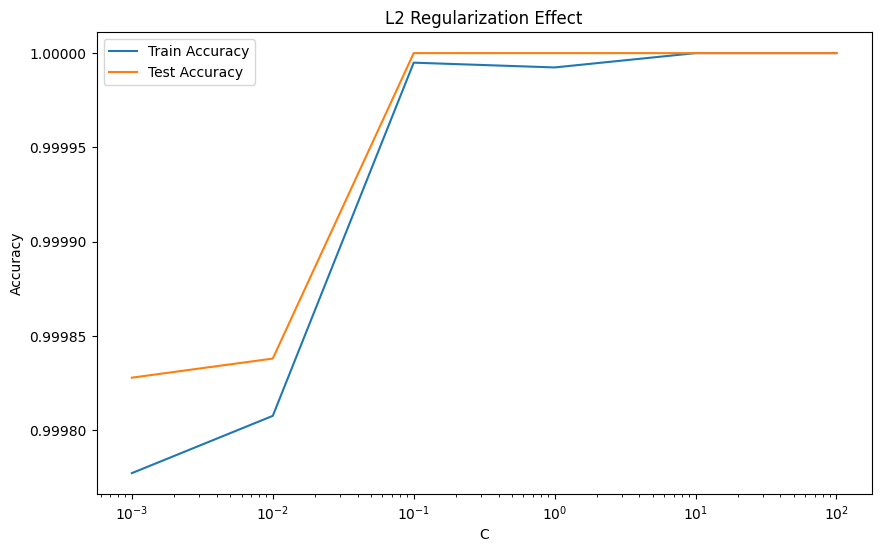

In [16]:
# plotting train and test accuracies for different C values
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_accuracies, label='Train Accuracy')
plt.plot(C_values, test_accuracies, label='Test Accuracy')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('L2 Regularization Effect')
plt.legend()
plt.show()

### Our plot shows that lower C values can cause a lower accuracy. However, there reaches a plateau point where increasing the C value no longer leads to an increased accuracy. This may occur because a lower C values indicate a stronger regularization strength, which could cause the model might to become too simplistic, leading to underfitting and decreased accuracies.

